# Dados Fornecidos

In [1]:
import pandas as pd
import numpy as geek
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
filename_features = "../Dados/UCI HAR Dataset/features.txt"
filename_labels = "../Dados/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "../Dados/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "../Dados/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "../Dados/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "../Dados/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "../Dados/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "../Dados/UCI HAR Dataset/test/y_test.txt"

In [3]:
# Remove squeeze=True
subject_train = pd.read_csv('/content/subject_train.txt', header=None, names=['subject_id'])

In [4]:
# Você pode usar o squeeze depois de ler o csv
subject_train = subject_train.squeeze()
X_train = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('/content/y_train.txt', header=None, names=['cod_label'])
subject_test = pd.read_csv('/content/subject_train.txt', header=None, names=['subject_id'])

<ipython-input-4-95993348d561>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None)


In [5]:
# Você pode usar o squeeze depois de ler o csv
subject_test = subject_test.squeeze()
X_test = pd.read_csv('/content/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('/content/y_test.txt', header=None, names=['cod_label'])

<ipython-input-5-1a27cafe0305>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('/content/X_test.txt', delim_whitespace=True, header=None)


# Códigos

In [6]:
# Função para medir o tempo de execução
def measure_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Tempo de execução: {execution_time:.4f} segundos")
        return result
    return wrapper
@measure_time
def train_and_evaluate_tree():
    # Criando e treinando a árvore de decisão
    clf = DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)
    clf.fit(X_train, y_train['cod_label'])

    # Fazendo previsões
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculando acurácias
    train_accuracy = accuracy_score(y_train['cod_label'], y_train_pred)
    test_accuracy = accuracy_score(y_test['cod_label'], y_test_pred)

    return clf, train_accuracy, test_accuracy

In [7]:
# Executando o treinamento e avaliação
clf, train_accuracy, test_accuracy = train_and_evaluate_tree()

print(f"Acurácia na base de treinamento: {train_accuracy:.4f}")
print(f"Acurácia na base de teste: {test_accuracy:.4f}")

# Informações adicionais sobre a árvore
print(f"\nProfundidade da árvore: {clf.get_depth()}")
print(f"Número de nós: {clf.get_n_leaves()}")

Tempo de execução: 14.0276 segundos
Acurácia na base de treinamento: 0.9758
Acurácia na base de teste: 0.8799

Profundidade da árvore: 10
Número de nós: 55


In [8]:
def measure_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Tempo de execução: {execution_time:.4f} segundos")
        return result
    return wrapper

@measure_time
def pca_tree_analysis():
    # Padronizando os dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Aplicando PCA com uma componente
    pca = PCA(n_components=1)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Criando e treinando a árvore de decisão
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train_pca, y_train['cod_label'])

    # Fazendo previsões
    y_train_pred = clf.predict(X_train_pca)
    y_test_pred = clf.predict(X_test_pca)

    # Calculando acurácias
    train_accuracy = accuracy_score(y_train['cod_label'], y_train_pred)
    test_accuracy = accuracy_score(y_test['cod_label'], y_test_pred)

    return clf, train_accuracy, test_accuracy, pca.explained_variance_ratio_[0]

In [9]:
# Executando a análise
clf, train_accuracy, test_accuracy, explained_variance = pca_tree_analysis()

print(f"Acurácia na base de treinamento: {train_accuracy:.4f}")
print(f"Acurácia na base de teste: {test_accuracy:.4f}")
print(f"Variância explicada pela primeira componente: {explained_variance:.4f}")

# Informações adicionais sobre a árvore
print(f"\nProfundidade da árvore: {clf.get_depth()}")
print(f"Número de nós: {clf.get_n_leaves()}")

Tempo de execução: 1.3427 segundos
Acurácia na base de treinamento: 0.9999
Acurácia na base de teste: 0.3885
Variância explicada pela primeira componente: 0.5078

Profundidade da árvore: 59
Número de nós: 4483


In [10]:
# Lista de números de componentes para testar
n_components_list = [1, 2, 5, 10, 50]

In [11]:
# Dicionário para armazenar os resultados
results = {
    'n_components': ([]),
    'train_accuracy': ([]),
    'test_accuracy': ([]),
    'execution_time': ([]),
    'explained_variance': ([])
}

In [12]:
def measure_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Tempo de execução: {execution_time:.4f} segundos")
        return result, execution_time
    return wrapper

@measure_time
def pca_tree_analysis(n_components=1):
    # Padronizando os dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Aplicando PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Criando e treinando a árvore de decisão
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train_pca, y_train['cod_label'])

    # Fazendo previsões
    y_train_pred = clf.predict(X_train_pca)
    y_test_pred = clf.predict(X_test_pca)

    # Calculando acurácias
    train_accuracy = accuracy_score(y_train['cod_label'], y_train_pred)
    test_accuracy = accuracy_score(y_test['cod_label'], y_test_pred)

    return clf, train_accuracy, test_accuracy, pca.explained_variance_ratio_[0],

# Executando a análise para cada número de componentes
for n_components in n_components_list:
    (clf, train_accuracy, test_accuracy, explained_variance), execution_time = pca_tree_analysis(n_components)

    results['n_components'].append(n_components)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['execution_time'].append(execution_time)
    results['explained_variance'].append(explained_variance)

    print(f"\nNúmero de componentes: {n_components}")
    print(f"Acurácia na base de treinamento: {train_accuracy:.4f}")
    print(f"Acurácia na base de teste: {test_accuracy:.4f}")
    print(f"Tempo de execução: {execution_time:.4f} segundos")
    print(f"Variância explicada: {explained_variance:.4f}")
    print(f"Profundidade da árvore: {clf.get_depth()}")
    print(f"Número de nós: {clf.get_n_leaves()}")

Tempo de execução: 0.6682 segundos

Número de componentes: 1
Acurácia na base de treinamento: 0.9999
Acurácia na base de teste: 0.3885
Tempo de execução: 0.6682 segundos
Variância explicada: 0.5078
Profundidade da árvore: 59
Número de nós: 4483
Tempo de execução: 0.6991 segundos

Número de componentes: 2
Acurácia na base de treinamento: 1.0000
Acurácia na base de teste: 0.4778
Tempo de execução: 0.6991 segundos
Variância explicada: 0.5078
Profundidade da árvore: 37
Número de nós: 2821
Tempo de execução: 0.8333 segundos

Número de componentes: 5
Acurácia na base de treinamento: 1.0000
Acurácia na base de teste: 0.7408
Tempo de execução: 0.8333 segundos
Variância explicada: 0.5078
Profundidade da árvore: 22
Número de nós: 1014
Tempo de execução: 1.0454 segundos

Número de componentes: 10
Acurácia na base de treinamento: 1.0000
Acurácia na base de teste: 0.7530
Tempo de execução: 1.0454 segundos
Variância explicada: 0.5078
Profundidade da árvore: 22
Número de nós: 766
Tempo de execução: 2

In [13]:
# Criando um DataFrame com os resultados
results_df = pd.DataFrame(results)
print("\nResumo dos resultados:")
print(results_df.to_string(index=False))


Resumo dos resultados:
 n_components  train_accuracy  test_accuracy  execution_time  explained_variance
            1        0.999864       0.388531        0.668196            0.507812
            2        1.000000       0.477774        0.699096            0.507812
            5        1.000000       0.740753        0.833286            0.507812
           10        1.000000       0.752969        1.045427            0.507812
           50        1.000000       0.765185        2.448483            0.507812


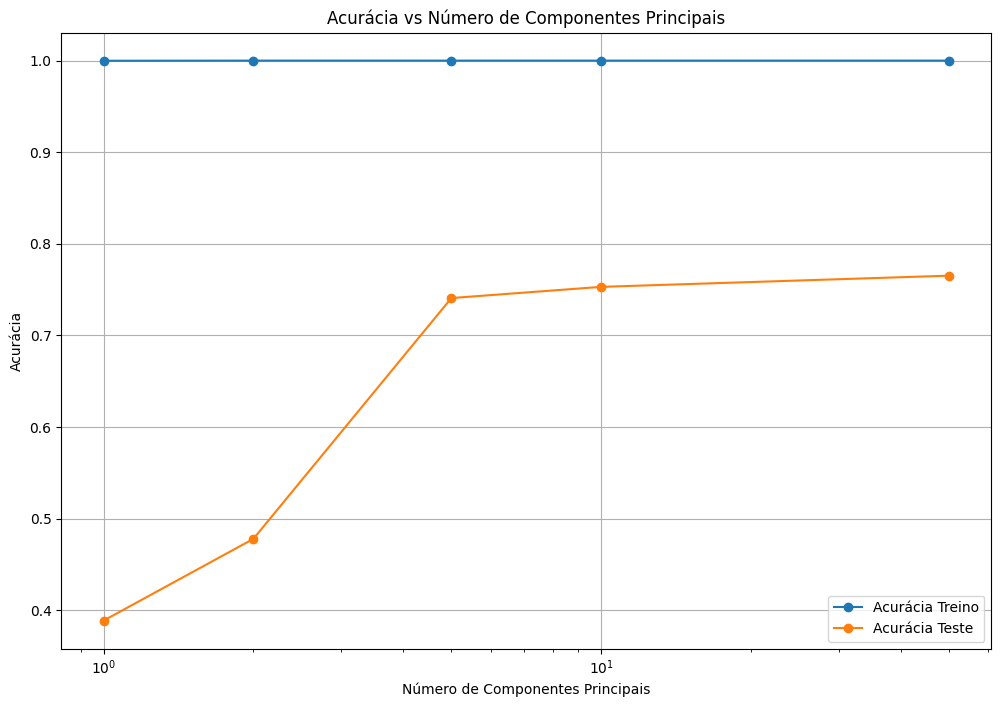

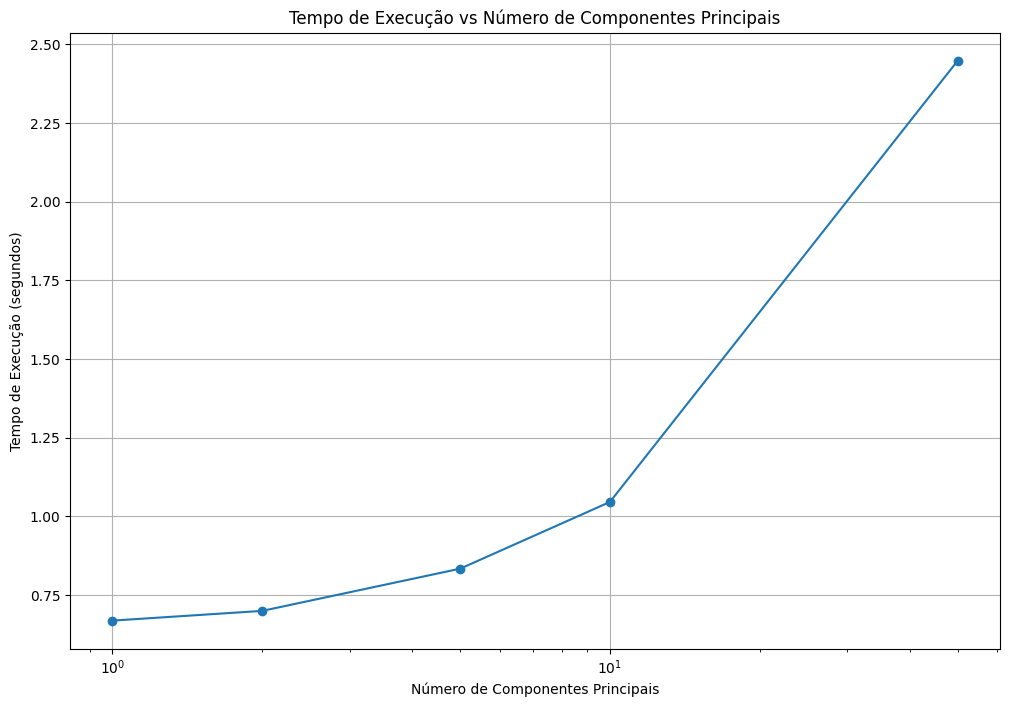

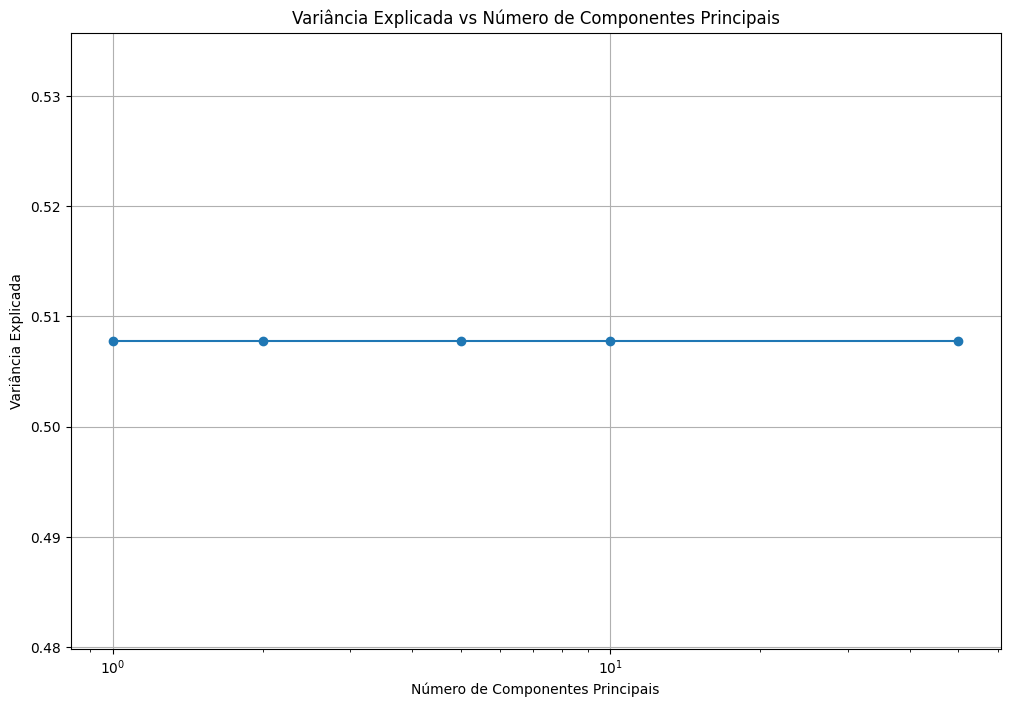

In [14]:
# Plotando os resultados
plt.figure(figsize=(12, 8))
plt.plot(results['n_components'], results['train_accuracy'], marker='o', label='Acurácia Treino')
plt.plot(results['n_components'], results['test_accuracy'], marker='o', label='Acurácia Teste')
plt.title('Acurácia vs Número de Componentes Principais')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Acurácia')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(results['n_components'], results['execution_time'], marker='o')
plt.title('Tempo de Execução vs Número de Componentes Principais')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Tempo de Execução (segundos)')
plt.xscale('log')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(results['n_components'], results['explained_variance'], marker='o')
plt.title('Variância Explicada vs Número de Componentes Principais')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada')
plt.xscale('log')
plt.grid(True)
plt.show()

## **1. Tendência geral: Geralmente, a acurácia tende a aumentar à medida que aumentamos o número de componentes principais, até um certo ponto.**

## **2. Acurácia de treino vs. teste:**
### - A acurácia de treino normalmente aumenta mais rapidamente e pode atingir valores mais altos.
### - A acurácia de teste geralmente aumenta mais lentamente e pode estabilizar ou até diminuir com muitos componentes.
## **3. Overfitting: Se a diferença entre a acurácia de treino e teste aumentar significativamente com mais componentes, isso pode indicar overfitting.**
## **4. Ponto de saturação: Frequentemente, há um ponto onde adicionar mais componentes não melhora significativamente a acurácia, especialmente na base de teste.**


# Tempo de processamento:

## **1. Tendência geral: O tempo de processamento geralmente aumenta à medida que aumentamos o número de componentes principais.**
## **2. Relação não-linear: O aumento no tempo de processamento pode não ser linear. Pode haver saltos mais significativos ao passar para números maiores de componentes.**
## **3. Trade-off: Há um trade-off entre acurácia e tempo de processamento. Mais componentes podem melhorar a acurácia, mas à custa de maior tempo de processamento.**
## **4. Eficiência computacional: Com poucos componentes, o processamento é geralmente muito rápido. Com muitos componentes, o tempo pode aumentar consideravelmente.**